# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience </a>

Дана параметрическая модель и 3 выборки, состоящие из 2-3 наблюдений. Для удобства, выборки представлены в виде python-кода — каждая выборка записана как список ее элементов; множество выборок представлено как список списков, соответствующих выборкам из множества. Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: `[[-1, 1], [-5, 5], [-1, 5]]`

*b).* Параметрическая модель $Exp(\theta)$, выборки: `[[1, 2], [0.1, 1], [1, 10]]`

*c).* Параметрическая модель $U[0, \theta]$, выборки: `[[0.2, 0.8], [0.5, 1], [0.5, 1.3]]`

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: `[[0, 1], [5, 5], [0, 5]]`

*e).* Параметрическая модель $Pois(\theta)$, выборки: `[[0, 1], [0, 10], [5, 10]]`

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, выборки: `[[-0.5, 0.5], [-2, 2], [-4, 0, 4]]`

Выполнить задание, не создавая много кода, поможет следующая функция.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
import typing as tp

In [5]:
def draw_likelihood(density_function: tp.Callable[[np.ndarray], np.ndarray], 
                    grid: np.ndarray, 
                    samples: tp.Iterable, 
                    label: str):
    '''
    Изображает график функции правдоподобия для каждой из 3 выборок.
    
    Аргументы:
        density_function --- функция, считающая плотность 
            (обычную или дискретную). На вход данная функция 
            должна принимать массив размера (1, len_sample)
            и возвращать массив размера (len_grid, len_sample).
        grid --- массив размера (len_grid, 1), являющийся 
                 сеткой для построения графика;
        samples --- три выборки;
        label --- latex-код параметрической модели.
    '''
    
    assert len(samples) == 3, "Число выборок не равно 3."

    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = np.prod(density_function(sample), axis = 1)

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода:

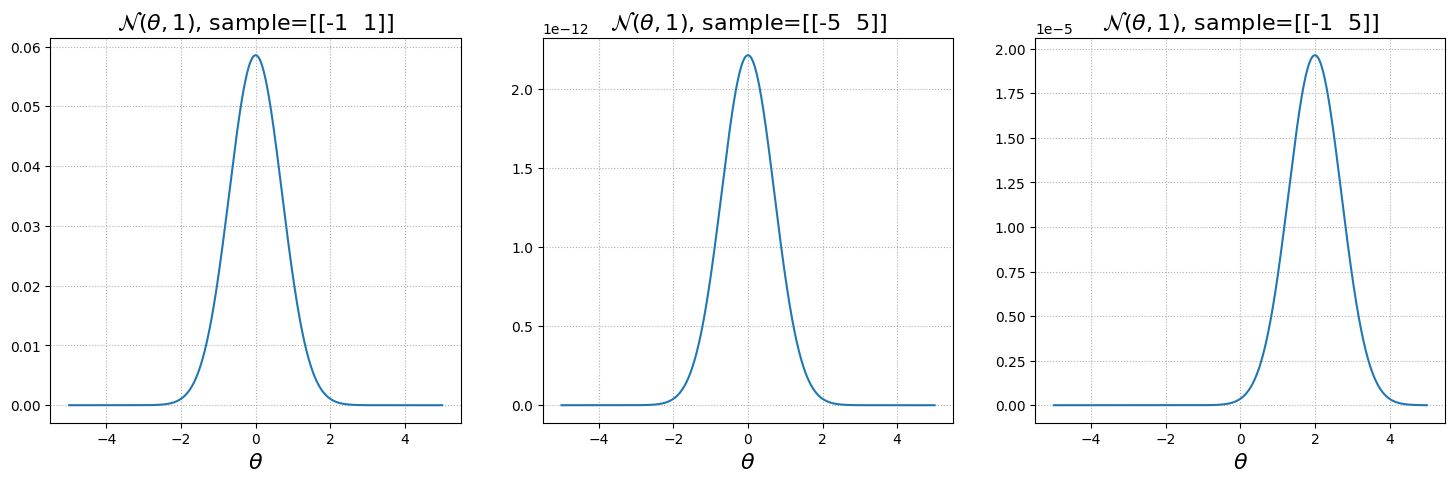

In [6]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid, 
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

Выполните остальные:

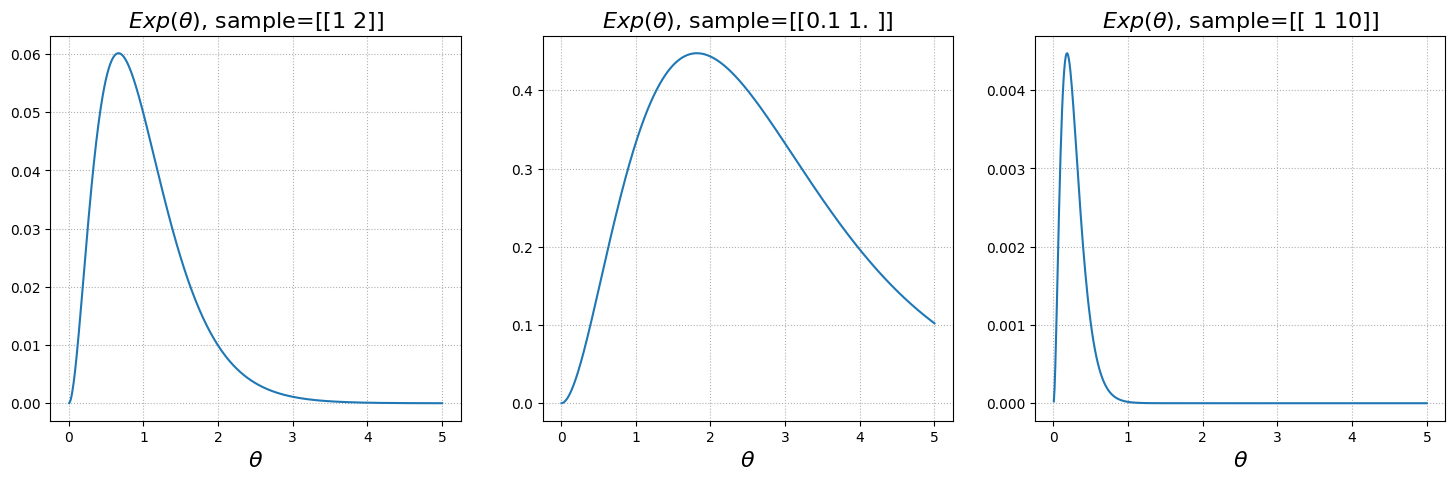

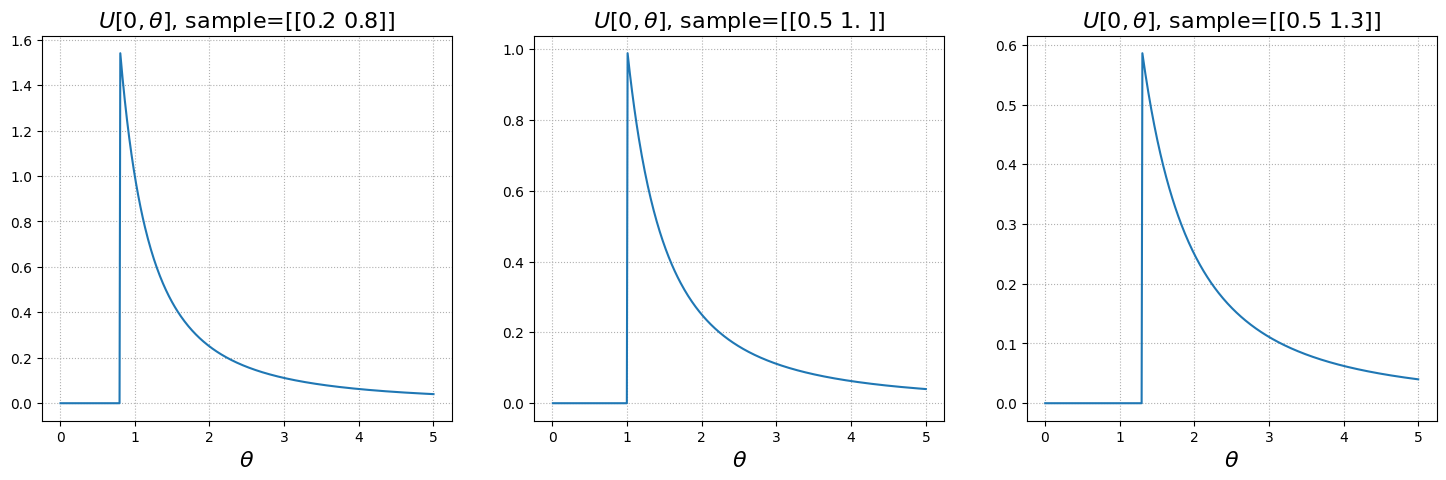

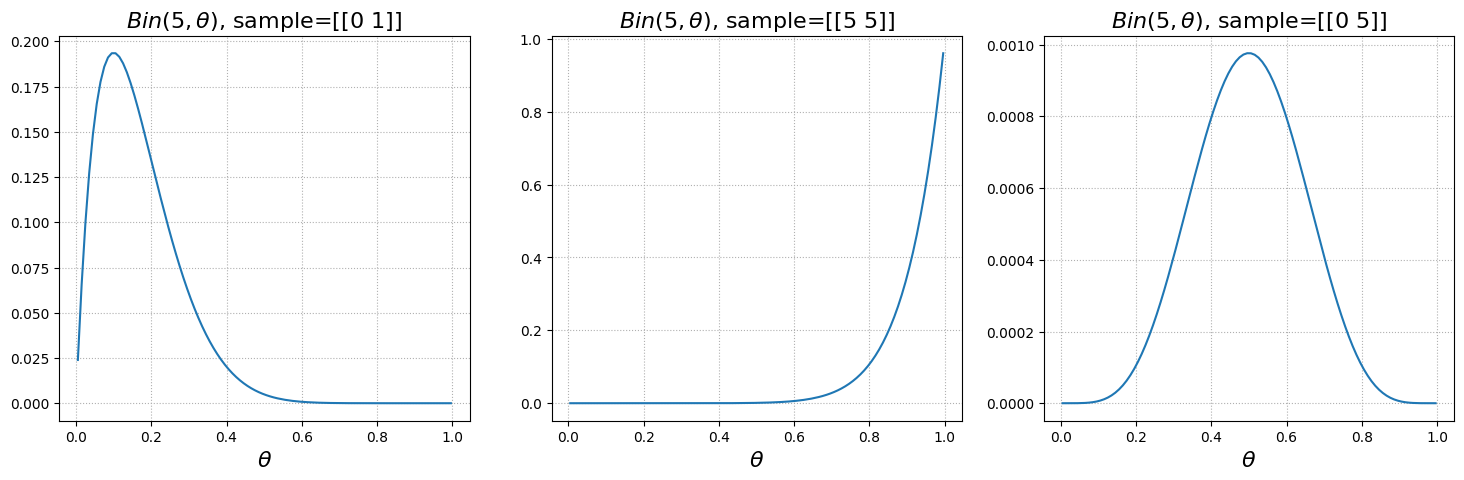

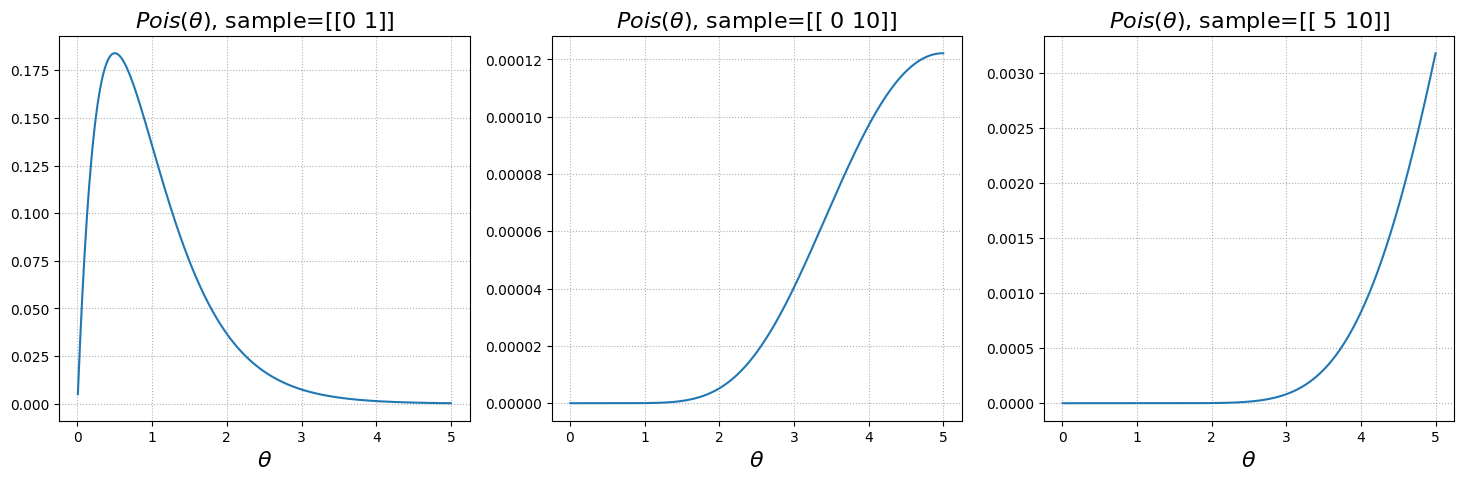

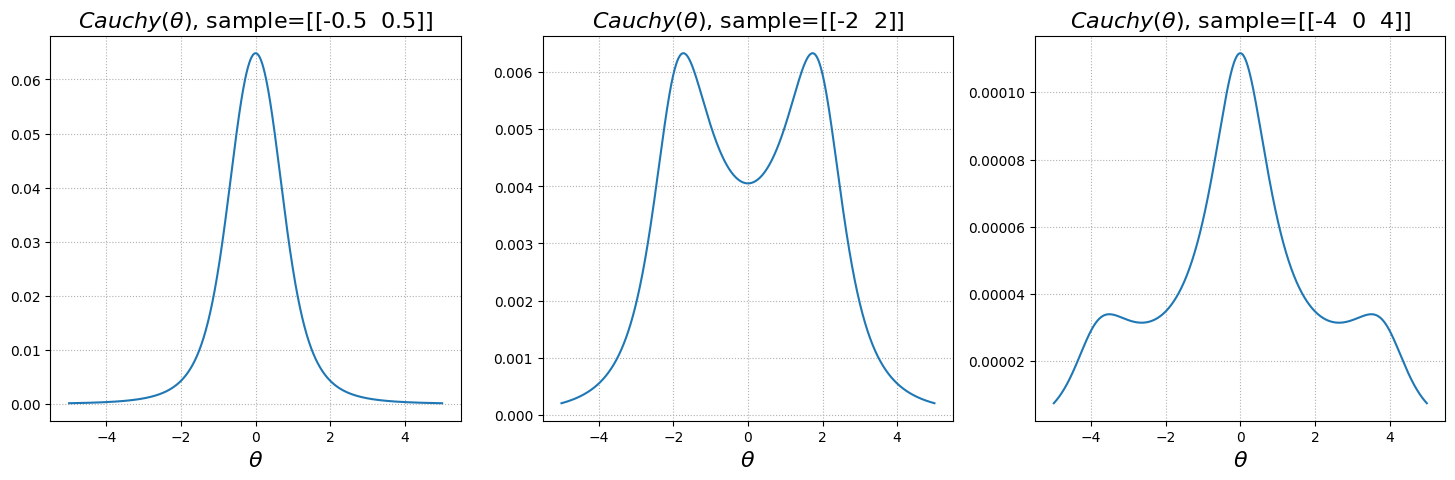

In [16]:
labels = (r'$Exp(\theta)$', 
          r'$U[0, \theta]$', 
          r'$Bin(5, \theta)$', 
          r'$Pois(\theta)$', 
          r'$Сauchy(\theta)$')

differentSamples = [[[1, 2], [0.1, 1], [1, 10]],
                    [[0.2, 0.8], [0.5, 1], [0.5, 1.3]],
                    [[0, 1], [5, 5], [0, 5]],
                    [[0, 1], [0, 10], [5, 10]],
                    [[-0.5, 0.5], [-2, 2], [-4, 0, 4]]]

densityFunctions = [sps.expon(scale = 1 / grid).pdf,
                    sps.uniform(scale = grid, loc = 0).pdf,
                    sps.binom(p = grid, n = 5).pmf,
                    sps.poisson(mu = grid).pmf,
                    sps.cauchy(loc = grid).pdf]

for label, sample, dens in zip(labels, differentSamples, densityFunctions):
    draw_likelihood(dens, 
                    grid, 
                    sample, 
                    label)

Прокомментируйте полученные графики. Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

**Вывод:**

Как видим, функция правдоподобия не является плотностью рассматриваемого распределения (видно на вышепостроенных графиках). Но является плотностью совместного распределения $n$ независимых одинаково распределённых случайных величин

Рассмотрим зависимость функции парвдоподобия для различных моделей:

1 - $Exp(\theta)$ - Как видим, функция тем шире, чем уже рассматриваемая выборка. Как видим функция всегда имеет единственный экстремум

2 - Равномерной распределение - Функция затухает быстрее на узких выборках. Опять имеем единственный максимум

3 - Биномиальное распределение - Как видим, если выборка состоит из одинаковых значений, равных количеству экспериментов, то вероятность успеха оценивается как единица(всё достаотчно логично). Опять имеем единственный экстремум

4 - Распределение Коши - здесь метод максимального правдоподобия работает плохо. Во втором эксперименте имеем два глобальных максимума. Условия регулярности не выполнены, во всех экспериментах имеем большое количество критических точек.

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже:

In [20]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчета оценки максимального правдоподобия? Реализуйте это.

*Подсказка:* нужно использовать некоторый метод класса, реализующий это распределение

**Ответ на вопрос и описание метода решения проблемы:**

Как видим функция правдоподобия в нуле достигает значение ноль. Проблема связана с переполнением стандарного размера `float` - столь малое число не может храниться и округляется до нуля. 

Для решения проблемы можем сгенерировать меньшую выборку и использовать переменную с бОльшим размером. Либо воспользоваться логарифмом функции правдоподобия

##### Вариант 1 - уменьшение размера выборки / увеличение размера переменной

In [24]:
sample = sps.norm.rvs(size=10**2)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

1.873790893898469e-68


##### Вариант 2 - логарифм 

In [23]:
sample = sps.norm.rvs(size=10**2)
likelihood = np.log(sps.norm.pdf(sample)).prod()
print(likelihood)

370374806104.721
